In [ ]:
# ---------------------------------------------
# IMPORTACIÓN DE LIBRERÍAS Y LECTURA DEL DATASET
# ---------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV local
csv_data = pd.read_csv('apple_quality.csv', delimiter=',')
df = pd.DataFrame(csv_data)

# DataFrame original
display(df) 

# ---------------------------------------------
# CONVERSIÓN DE VARIABLES Y LIMPIEZA DE DATOS
# ---------------------------------------------

# la columna 'Acidity' puede contener valores no numéricos. Para poder realizar operaciones matemáticas con ella, la convierto a tipo numérico.
# Utilizo 'errors='coerce'' para que cualquier valor que no pueda ser convertido, se transforme en 'NaN' (Not a Number)
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

# Mi columna objetivo, 'Quality', es categórica ('bad' o 'good'). Para que la red neuronal pueda trabajar con ella, necesito convertirla a un formato numérico.
# hago que 'bad' a 0 y 'good' a 1, creando una nueva columna 'Quality_numeric'. Esto es para que sea un problema de clasificación binaria.
df['Quality_numeric'] = df['Quality'].map({'bad': 0, 'good': 1})

# elimino todas las filas que contengan cualquier valor NaN.
# Hago una copia del DataFrame (`.copy()`) para asegurar que no estoy modificand el DataFrame original.
df_cleaned = df.dropna().copy()

# ---------------------------------------------
# muevo la variable obj al final (por comodidad)
cols = [col for col in df_cleaned.columns if col != 'Quality_numeric']
df_cleaned = df_cleaned[[*cols, 'Quality_numeric']]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


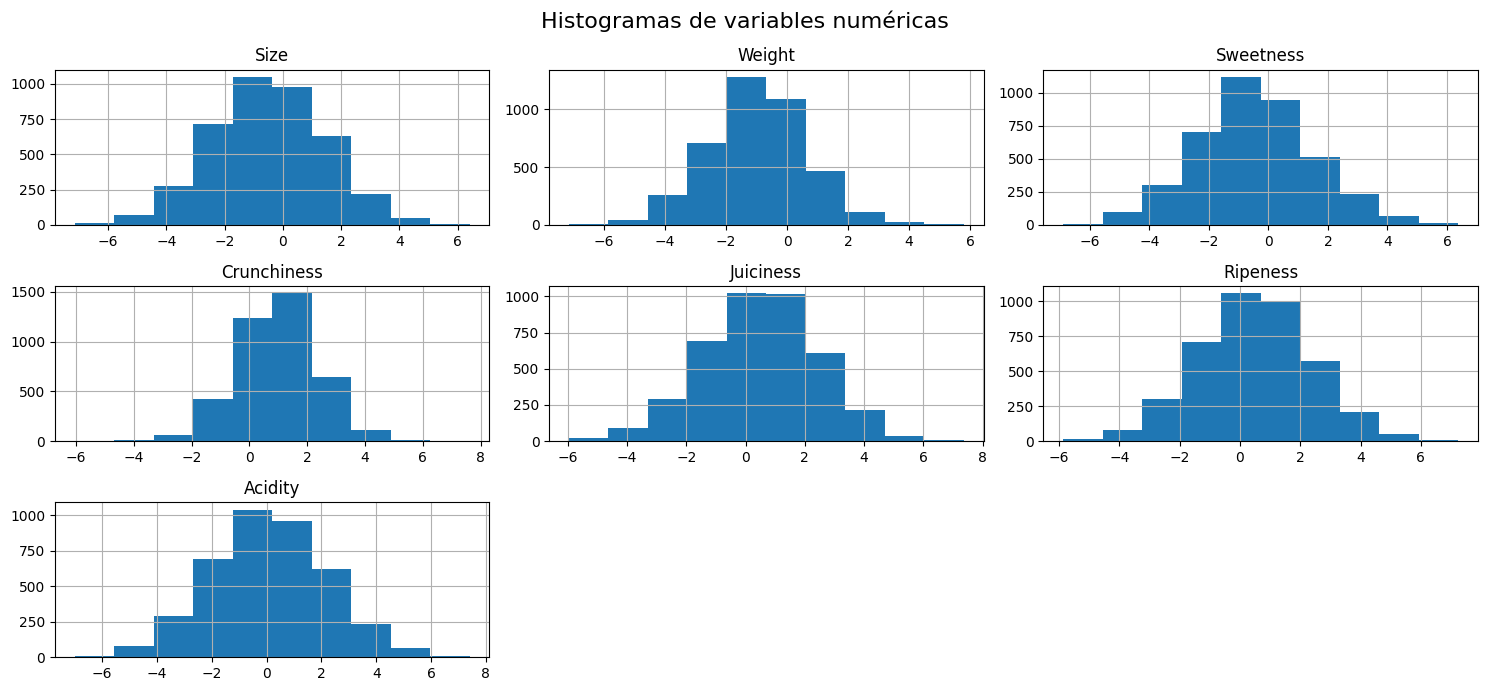

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736
Quality_numeric,4000.0,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


In [34]:

# ---------------------------------------------
# HISTOGRAMAS DE DISTRIBUCIÓN
# ---------------------------------------------
# genero histogramas. Esto me ayuda a ver si los datos están distribuidos normalmente,
# si están sesgados, o si hay múltiples picos.

features_for_hist = df_cleaned[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
features_for_hist.hist(bins=10, figsize=(15, 7))
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# ---------------------------------------------
# ESTADÍSTICAS DESCRIPTIVAS
# ---------------------------------------------
# calculo las estadísticas descriptivas (media, desviación estándar, min, max, cuartiles).
# Transpongo el resultado (`.T`) para que sea más fácil de leer, con las estadísticas como columnas.

df_stats = df_cleaned.describe().T
print("Estadísticas descriptivas:")
display(df_stats) # display() para mostrar la tabla de estadísticas

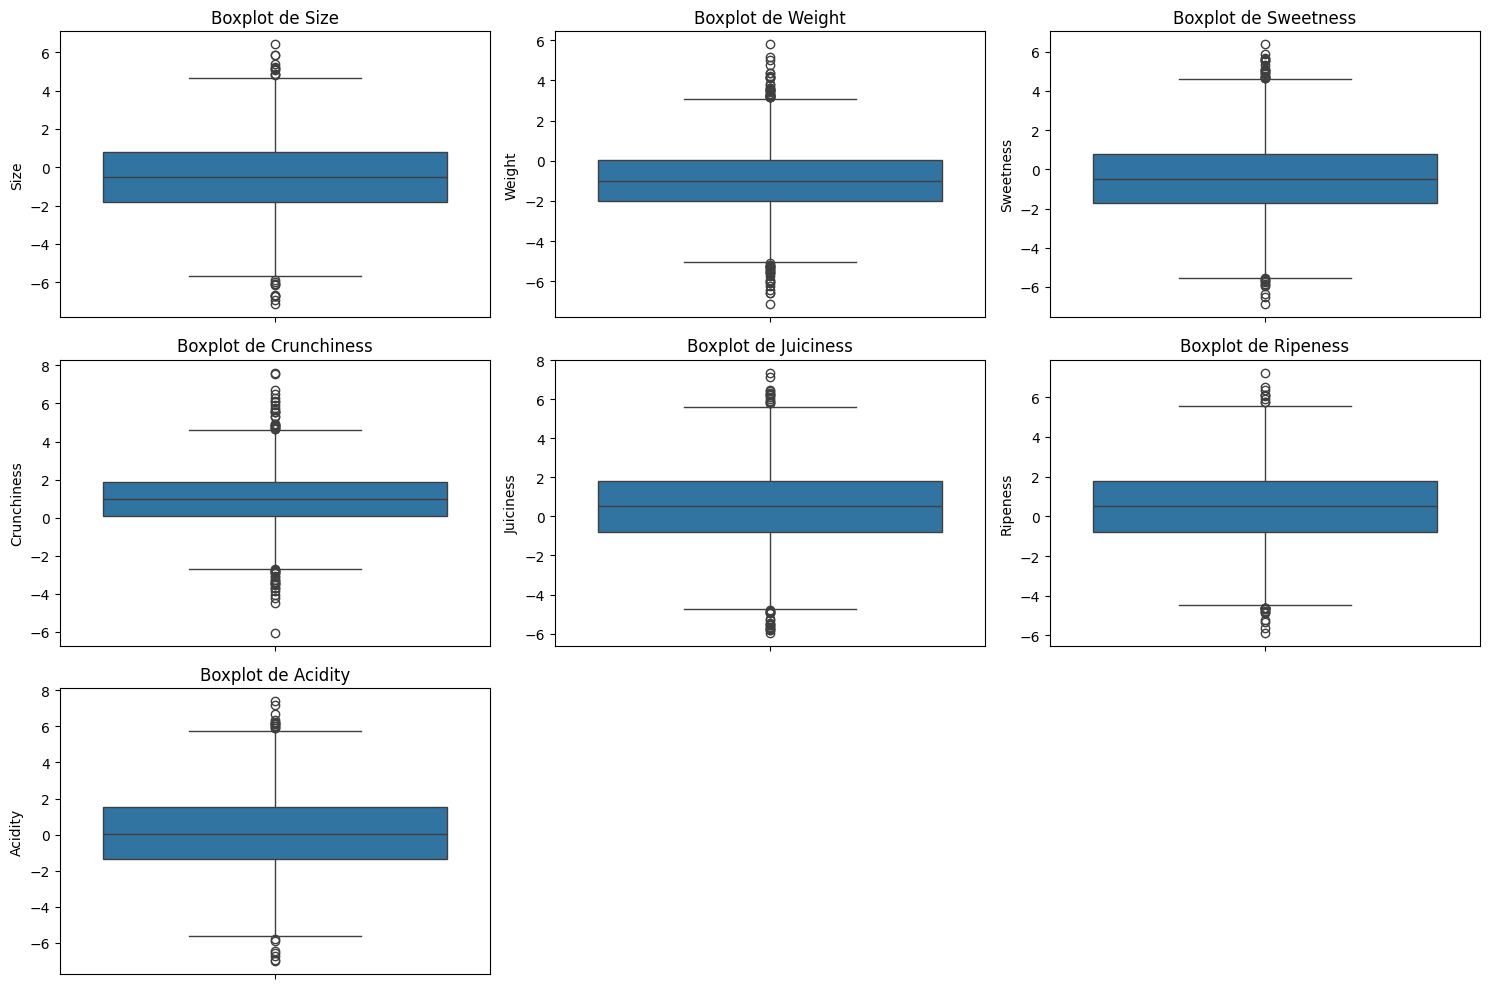

Valores nulos restantes:


A_id               0
Size               0
Weight             0
Sweetness          0
Crunchiness        0
Juiciness          0
Ripeness           0
Acidity            0
Quality            0
Quality_numeric    0
dtype: int64

In [35]:
# ---------------------------------------------
# DETECCIÓN DE OUTLIERS (BOXPLOTS)
# ---------------------------------------------
# Para identificar visualmente si existen valores atípicos (outliers) en mis características,

plt.figure(figsize=(15, 10))
for i, column in enumerate(features_for_hist.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# CHEQUEO FINAL DE NULOS
# ---------------------------------------------

print("Valores nulos restantes:")
display(df_cleaned.isnull().sum()) #para mostrar la suma de nulos

In [ ]:
# ---------------------------------------------
# ESTANDARIZACION
# ---------------------------------------------
df_estandarizado = df_cleaned.copy()

columnas_a_estandarizar = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for column in columnas_a_estandarizar:
    #  media (u) de la columna
    media = df_estandarizado[column].mean()
    # desviación estandar (s) de la columna
    desviacion_estandar = df_estandarizado[column].std()

    # aplico la fórmula z = (x - u) / s
    if desviacion_estandar != 0: #no puedo dividir x 0
        df_estandarizado[column] = (df_estandarizado[column] - media) / desviacion_estandar
    else:
        df_estandarizado[column] = 0

print("DataFrame luego d estandarizar (Z-score):")
display(df_estandarizado.head())

DataFrame después de la estandarización (Z-score):


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality_numeric
0,0.0,-1.798199,-0.950255,2.993046,-1.423972,0.690459,-0.089861,-0.269382,good,1.0
1,1.0,-0.359015,-1.154260,2.127432,0.429693,0.176745,0.196995,-0.378950,good,1.0
2,2.0,0.109432,-0.225731,-0.652426,-0.946774,1.205271,-0.286120,1.205893,bad,0.0
3,3.0,-0.079967,-0.800046,0.923801,-0.772302,1.619373,-2.087059,0.338272,good,1.0
4,4.0,0.968452,-0.191616,0.044159,-1.096757,1.304862,-0.961428,0.201447,good,1.0


Matriz de Correlación:


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_numeric
A_id,1.000000,-0.028911,-0.005730,-0.002378,-0.013111,0.006179,0.000742,-0.022237,0.004875
Size,-0.028911,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.005730,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.002378,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,-0.013111,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,0.006179,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,0.000742,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,-0.022237,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality_numeric,0.004875,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


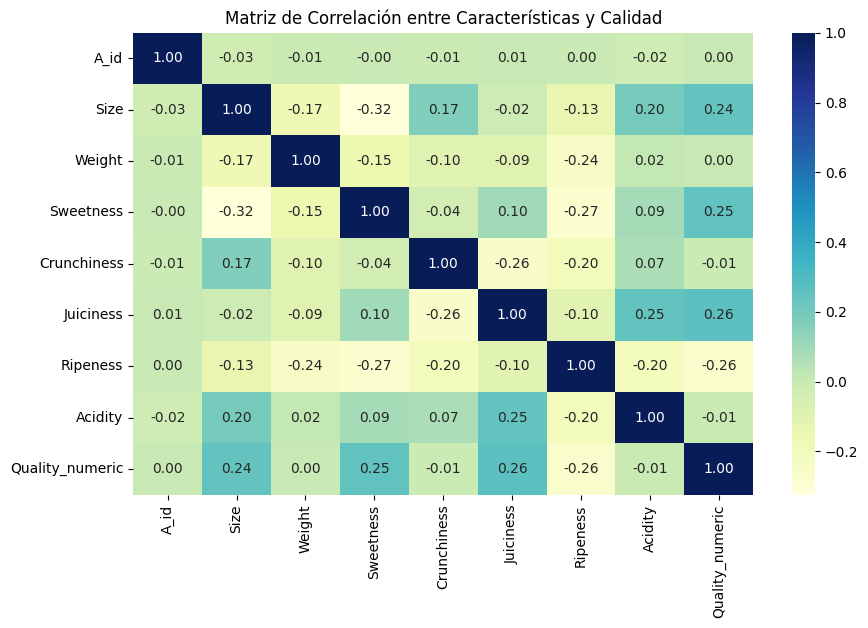

In [37]:
# ---------------------------------------------
# MATRIZ DE CORRELACIÓN
# ---------------------------------------------

numeric_df = df_cleaned.select_dtypes(include=['number'])
# calculo la correlación de Pearson
correlations = numeric_df.corr(method='pearson')

print("Matriz de Correlación:")
display(correlations) # Usar display() para mostrar la tabla de correlación

# ---------------------------------------------
# MAPA DE CALOR DE CORRELACIONES
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.heatmap(correlations, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Matriz de Correlación entre Características y Calidad")
plt.show()
